In [42]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [43]:
len(df_claim)

1428600

In [44]:
df_claim_uspto = df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [45]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [46]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [47]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [48]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [49]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [50]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [11]:
#Divide the dataset into different size
df_claim_50K=df_claim_uspto[:50000]
df_claim_50K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",an apparatus comprising a head tracker config...,head tracker track head position head person g...,head tracker track head position head person g...,"[head, tracker, track, head, position, head, p..."
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",a system comprising a semiconductor chip and ...,semiconductor chip multilayer interconnecting ...,semiconductor chip multilayer interconnecting ...,"[semiconductor, chip, multilayer, interconnect..."
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,a communication system comprising a ggsn incl...,communication ggsn central processing unit net...,communication ggsn central processing unit net...,"[communication, ggsn, central, processing, uni..."
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,a hand held breast pump system comprising a b...,hand held breast pump body diaphragm sealing c...,hand held breast pump body diaphragm sealing c...,"[hand, held, breast, pump, body, diaphragm, se..."


# Bertopic for 50k patent

In [23]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=60, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=25, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_50K['Lemmatized-Claim'])

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2023-03-15 15:39:49,304 - BERTopic - Transformed documents to Embeddings
2023-03-15 15:41:57,361 - BERTopic - Reduced dimensionality
2023-03-15 15:42:05,314 - BERTopic - Clustered reduced embeddings


In [13]:
#evaluation

In [24]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_50K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_50K['Lemmatized-Claim'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  0.03623119211204281


In [25]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_50K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_50K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5273248533781221


In [26]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_50K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_50K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -0.8740943435043326


In [27]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,36803,-1_network_image_message_substrate
1,0,573,0_shaft_magnet_core_bearing
2,1,479,1_antenna_radiating_ground_feed
3,2,398,2_key_authentication_token_encrypted
4,3,335,3_semiconductor_conductivity type_conductivity...
...,...,...,...
160,159,26,159_negative electrode_active material_positiv...
161,160,26,160_url_web_web page_page
162,161,26,161_node_flow_network communication_network
163,162,26,162_coverage_wireless_radio access_access network


In [28]:
df_claim_50K['Bertopic_topics'] = topics
df_claim_50K['Bertopic_prob'] = probabilities
#search_topics=df_claim_20K[df_claim_20K['predicted_topic'] == 71]
#search_topics = search_topics.sort_values('predicted_topic_prob', ascending=False)
#search_topics = df_claim_20K.reset_index().rename(columns={'index': 'new_index'})
df_Claim_50K_topic=df_claim_50K[["ID","Title","Claim", "Lemmatized-Claim","Bertopic_topics","Bertopic_prob"]]
df_Claim_50K_topic

,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...",advertising displaying television program vide...,29,1.00000
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...",receiving mobile switching network carrier gat...,-1,0.00000
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,resistance change memory first interconnect li...,-1,0.00000
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,processing first processing second processing ...,-1,0.00000
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,computerimplemented transferring electronic de...,-1,0.00000
...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,head tracker track head position head person g...,-1,0.00000
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,semiconductor chip multilayer interconnecting ...,-1,0.00000
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,communication ggsn central processing unit net...,-1,0.00000
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,hand held breast pump body diaphragm sealing c...,-1,0.00000


In [29]:
#prediction

In [30]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [31]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

In [32]:
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_claim, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 3 similar topics are [151, 112, 149], and the similarities are [0.63 0.61 0.61]
Topic 1: antenna 0.06629169464221304
Topic 2: mixer 0.1232138263095923
Topic 3: wireless 0.08407009684551152


In [33]:
filter_topics_Bertopic=df_Claim_50K_topic[df_Claim_50K_topic['Bertopic_topics'] == 151]
filter_topics_Bertopic = filter_topics_Bertopic.sort_values('Bertopic_prob', ascending=False)
filter_topics_Bertopic = filter_topics_Bertopic.reset_index().rename(columns={'index': 'new_index'})
filter_topics_Bertopic

,new_index,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob
0,2181,8928400,Semiconductor device having first and second d...,1. A semiconductor device for wireless communi...,semiconductor wireless communication first dem...,151,1.000000
1,5662,8942272,Method and apparatus for enabling signal proce...,1. A method for wireless communications for a ...,wireless communication repeater communication ...,151,1.000000
2,47623,9054760,Wireless data transmission including assist si...,"1. A method, implemented in a secondary transm...",implemented secondary transmitter communicatin...,151,1.000000
3,45888,9047523,Systems and methods using single antenna for m...,"1. A system, comprising: a radio frequency com...",radio frequency communication antenna operate ...,151,1.000000
4,44300,9042825,Wireless coexistence through antenna switching,"1. An apparatus, comprising: two antennas; a f...",two antenna first transceiver communicate eith...,151,1.000000
5,41592,9035839,Multi-feed diversity receive system and method,1. An antenna system for receiving wireless si...,antenna receiving wireless signal feed antenna...,151,1.000000
6,38208,9026043,System architecture for high density satellite...,1. A transmission and reception spot beam ante...,transmission reception spot beam antenna first...,151,1.000000
7,36250,9020440,Radio channel data and the use thereof,"1. An apparatus, wherein the apparatus compris...",comprises receiver receive wireless transmissi...,151,1.000000
8,35124,9020518,Generalized codebook design method for limited...,1. A receiver for a wireless communication sys...,receiver wireless communication one antenna re...,151,1.000000
9,34176,9014621,Short-range cellular booster,1. A method for mediating wireless communicati...,mediating wireless communication network trans...,151,1.000000


In [34]:
#caculate the similarity between docs and new claim

In [35]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load the pre-trained model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the documents in the dataset
document_embeddings = sbert_model.encode(filter_topics_Bertopic['Lemmatized-Claim'])

# Encode the new sample
document_embeddings = np.vstack(document_embeddings)
new_sample_embedding = sbert_model.encode([new_claim])

# Compute cosine similarity scores
cos_similarities = cosine_similarity(document_embeddings, new_sample_embedding)
filter_topics_Bertopic['cosine_similarity_BERTopic'] = cos_similarities.flatten()


# Compute euclidean distances
#euc_distances = euclidean_distances(document_embeddings, new_sample_embedding)
#search_topics['euclidean_distance'] = euc_distances.flatten()

# Sort by cosine similarity and display the top results
#search_topics.sort_values('cosine_similarity_BERTopic', ascending=False, inplace=True)

In [36]:
filter_topics_Bertopic

,new_index,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob,cosine_similarity_BERTopic
0,2181,8928400,Semiconductor device having first and second d...,1. A semiconductor device for wireless communi...,semiconductor wireless communication first dem...,151,1.000000,0.761266
1,5662,8942272,Method and apparatus for enabling signal proce...,1. A method for wireless communications for a ...,wireless communication repeater communication ...,151,1.000000,0.773745
2,47623,9054760,Wireless data transmission including assist si...,"1. A method, implemented in a secondary transm...",implemented secondary transmitter communicatin...,151,1.000000,0.840656
3,45888,9047523,Systems and methods using single antenna for m...,"1. A system, comprising: a radio frequency com...",radio frequency communication antenna operate ...,151,1.000000,0.789055
4,44300,9042825,Wireless coexistence through antenna switching,"1. An apparatus, comprising: two antennas; a f...",two antenna first transceiver communicate eith...,151,1.000000,0.591058
5,41592,9035839,Multi-feed diversity receive system and method,1. An antenna system for receiving wireless si...,antenna receiving wireless signal feed antenna...,151,1.000000,0.759833
6,38208,9026043,System architecture for high density satellite...,1. A transmission and reception spot beam ante...,transmission reception spot beam antenna first...,151,1.000000,0.788544
7,36250,9020440,Radio channel data and the use thereof,"1. An apparatus, wherein the apparatus compris...",comprises receiver receive wireless transmissi...,151,1.000000,0.803590
8,35124,9020518,Generalized codebook design method for limited...,1. A receiver for a wireless communication sys...,receiver wireless communication one antenna re...,151,1.000000,0.780542
9,34176,9014621,Short-range cellular booster,1. A method for mediating wireless communicati...,mediating wireless communication network trans...,151,1.000000,0.848244


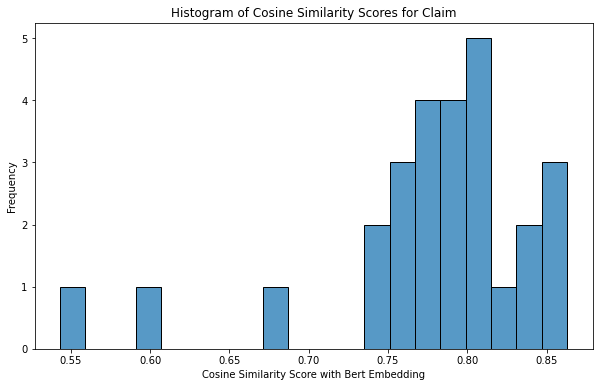

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_Bertopic['cosine_similarity_BERTopic']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Claim')
plt.xlabel('Cosine Similarity Score with Bert Embedding')
plt.ylabel('Frequency')
plt.show()

In [38]:
#get the most similar doc in dataset to query

In [39]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Claim']

most_similar_doc

'1. A wireless communication device, comprising: a plurality of communication units for transmission adapted to modulate and transmit respective transmission subject signals; said plurality of communication units for transmission including a first communication unit for transmission which is configured to use a first modulation that modulates only the amplitude and at least one other communication unit for transmission which is configured to use a second modulation that modulates at least one of the phase and the frequency and requires a transmission power lower than the first modulation, wherein: the total number of the communication units for transmission is three or more, the first communication unit for transmission is the only one of the communication units for transmission that is configured to use the first modulation, and the first communication unit for transmission is the only one of the communication units for transmission that includes a local oscillator for generating a ca

In [40]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Lemmatized-Claim']

most_similar_doc

'wireless communication communication unit transmission adapted modulate transmit respective transmission subject signal communication unit transmission first communication unit transmission use first modulation modulates amplitude least one communication unit transmission use second modulation modulates least one phase frequency requires transmission power lower first modulation total number communication unit transmission three first communication unit transmission one communication unit transmission use first modulation first communication unit transmission one communication unit transmission local oscillator generating carrier frequency local oscillator integrated circuit first communication unit transmission'

In [41]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['ID']

most_similar_doc

8995935